Признаки из набора данных:

In [1]:
#Age: The age of the patient. (Numeric)
#Gender: The gender of the patient. Male - 1, Female - 2
#Air Pollution: The level of air pollution exposure of the patient. (Categorical)
#Alcohol use: The level of alcohol use of the patient. (Categorical)
#Dust Allergy: The level of dust allergy of the patient. (Categorical)
#OccuPational Hazards: The level of occupational hazards of the patient. (Categorical)
#Genetic Risk: The level of genetic risk of the patient. (Categorical)
#chronic Lung Disease: The level of chronic lung disease of the patient. (Categorical)
#Balanced Diet: The level of balanced diet of the patient. (Categorical)
#Obesity: The level of obesity of the patient. (Categorical)
#Smoking: The level of smoking of the patient. (Categorical)
#Passive Smoker: The level of passive smoker of the patient. (Categorical)
#Chest Pain: The level of chest pain of the patient. (Categorical)
#Coughing of Blood: The level of coughing of blood of the patient. (Categorical)
#Fatigue: The level of fatigue of the patient. (Categorical)
#Weight Loss: The level of weight loss of the patient. (Categorical)
#Shortness of Breath: The level of shortness of breath of the patient. (Categorical)
#Wheezing: The level of wheezing of the patient. (Categorical)
#Swallowing Difficulty: The level of swallowing difficulty of the patient. (Categorical)
#Clubbing of Finger Nails: The level of clubbing of finger nails of the patient. (Categorical)

In [2]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression # 1
from sklearn.naive_bayes import GaussianNB # 2
from sklearn.svm import SVC # 3

In [3]:
file_path = 'cancer patient data sets.csv'
data = pd.read_csv(file_path)

data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

(   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
 0      0         P1   33       1              2            4             5   
 1      1        P10   17       1              3            1             5   
 2      2       P100   35       1              4            5             6   
 3      3      P1000   37       1              7            7             7   
 4      4       P101   46       1              6            8             7   
 
    OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
 0                     4             3                     2  ...        3   
 1                     3             4                     2  ...        1   
 2                     5             5                     4  ...        8   
 3                     7             6                     7  ...        4   
 4                     7             7                     6  ...        3   
 
    Weight Loss  Shortness of Breath  Wheezing  Swallo

>Переведем категориальную целевую переменную в числовой формат 

In [4]:
print(data['Level'].unique())

level_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
data['Level'] = data['Level'].map(level_mapping)

print(data['Level'].unique())

['Low' 'Medium' 'High']
[0 1 2]


>Убираем ненужные столбцы

In [5]:
data.drop(columns=['index', 'Patient Id'], inplace=True)

In [6]:
# Проверка распределения классов в целевом признаке
level_distribution = data['Level'].value_counts(normalize=True)
level_distribution

Level
2    0.365
1    0.332
0    0.303
Name: proportion, dtype: float64

> В целом все равномерно. Это ни хорошо, ни плохо - для обучения одной модели поможет, для второй - создаст проблемы.

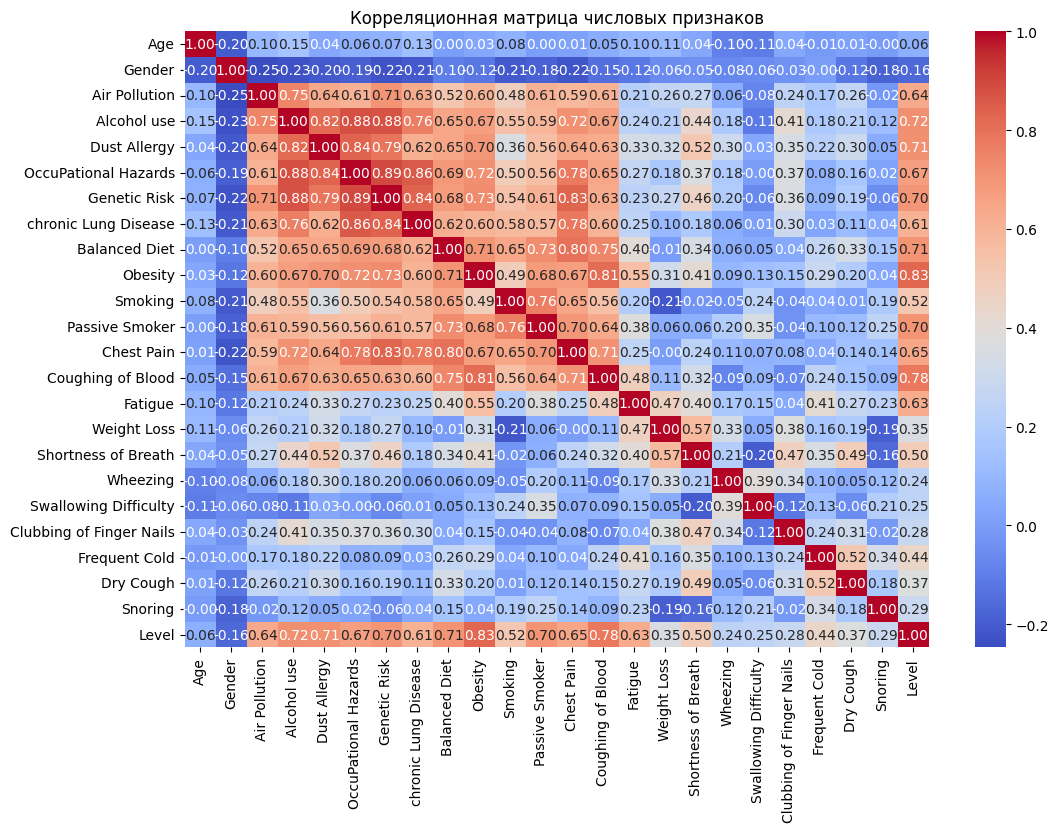

In [7]:
# Выделим числовые признаки
numeric_features = data.select_dtypes(include='int64').columns
# Корреляционная матрица для числовых данных
correlation_matrix = data[numeric_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляционная матрица числовых признаков")
plt.show()

<h6>Меньше всего коррелируют пол и возраст, что значит риск есть всегда, вот такие пироги</h6>

In [8]:
X = data.drop(columns='Level')
y = data.Level

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# 1. Мультиноминальная регрессия

In [10]:
# Обучаем модель мультиноминальной регрессии
MR = LogisticRegression(solver='newton-cg', random_state=40)
MR.fit(X_train, y_train)
MR_pred = MR.predict(X_test)

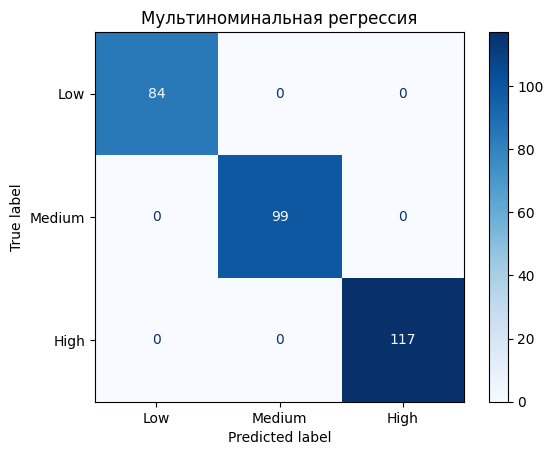

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [11]:
# Построение матрицы ошибок
cm = confusion_matrix(y_test, MR_pred, labels=MR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Мультиноминальная регрессия')
plt.show()

# Отчет классификации
print(classification_report(y_test, MR_pred))

In [12]:
# Сохраняем модель
joblib.dump(MR, 'MR_lung.pkl')

['MR_lung.pkl']

# 2. Наивный байесовский классификатор
Допустим признаки независимы между собой

In [13]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

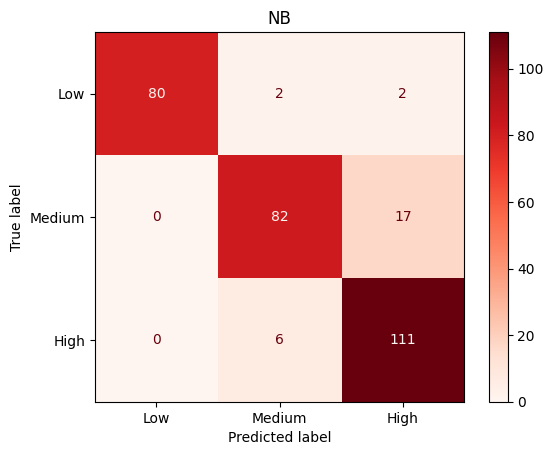

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.91      0.83      0.87        99
           2       0.85      0.95      0.90       117

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [14]:
cmnb = confusion_matrix(y_test, nb_pred, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmnb, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap=plt.cm.Reds)
plt.title('NB')
plt.show()

print(classification_report(y_test, nb_pred))

In [15]:
# Сохраняем модель
joblib.dump(nb_model, 'NB_lung.pkl')

['NB_lung.pkl']

# 3. Support Vector Machine
Метод опорных векторов

In [16]:
# На эту тему я выполняла учебную практику...
svm_model = SVC(C=0.5, kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

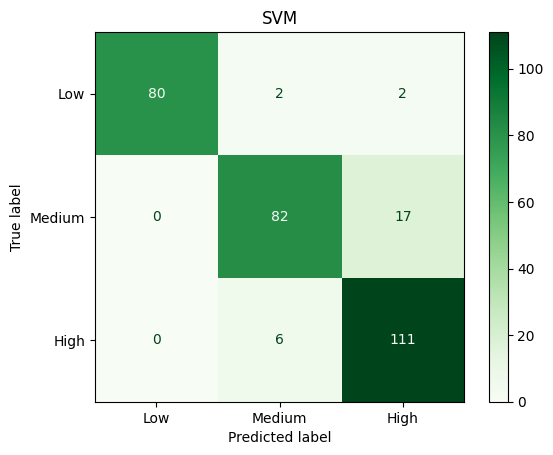

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [17]:
cmsvm = confusion_matrix(y_test, svm_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmnb, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap=plt.cm.Greens)
plt.title('SVM')
plt.show()

print(classification_report(y_test, svm_pred))

In [18]:
# Сохраняем модель
joblib.dump(svm_model, 'SVM_lung.pkl')

['SVM_lung.pkl']